In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [84]:
from warnings import simplefilter,filterwarnings
from sklearn.exceptions import DataConversionWarning
simplefilter(action='ignore',category = FutureWarning)
simplefilter(action='ignore',category = RuntimeWarning)
filterwarnings(action='ignore',category=DataConversionWarning)

## 0.0.1 Import Data

In [85]:
raw_data = pd.read_csv("corn_data.csv")
raw_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,output
0,0,1,-1,1,1,1,0,1,-1,1,...,-1,1,-1,1,1,-1,0,0,-1,2.516485
1,1,1,-1,1,1,-1,-1,1,-1,1,...,-1,1,-1,0,1,-1,-1,1,0,1.640909
2,2,0,1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,0,0.416348
3,3,1,1,1,0,-1,1,1,-1,1,...,-1,1,-1,-1,1,-1,-1,1,0,1.338558
4,4,1,1,1,0,-1,-1,1,0,1,...,-1,1,-1,0,-1,-1,1,1,0,1.729517


In [115]:
X = raw_data.iloc[:,1:-1]
y = raw_data.iloc[:,-1:]
print("X shape:",X.shape)
print("y shape:",y.shape)
print("Min y:",min(np.array(y))[0])
print("Max y:",max(np.array(y))[0])

X shape: (264, 1135)
y shape: (264, 1)
Min y: 0.0117532464005208
Max y: 4.9270454514617015


## 0.0.2 Visualize our data

We would like to visualize how the values of the output are distributed, using a histogram. 

Since our output values range from 0.01 to 4.92, it makes sense to display our output in bins from [0-1] to [4-5]

<IPython.core.display.Javascript object>


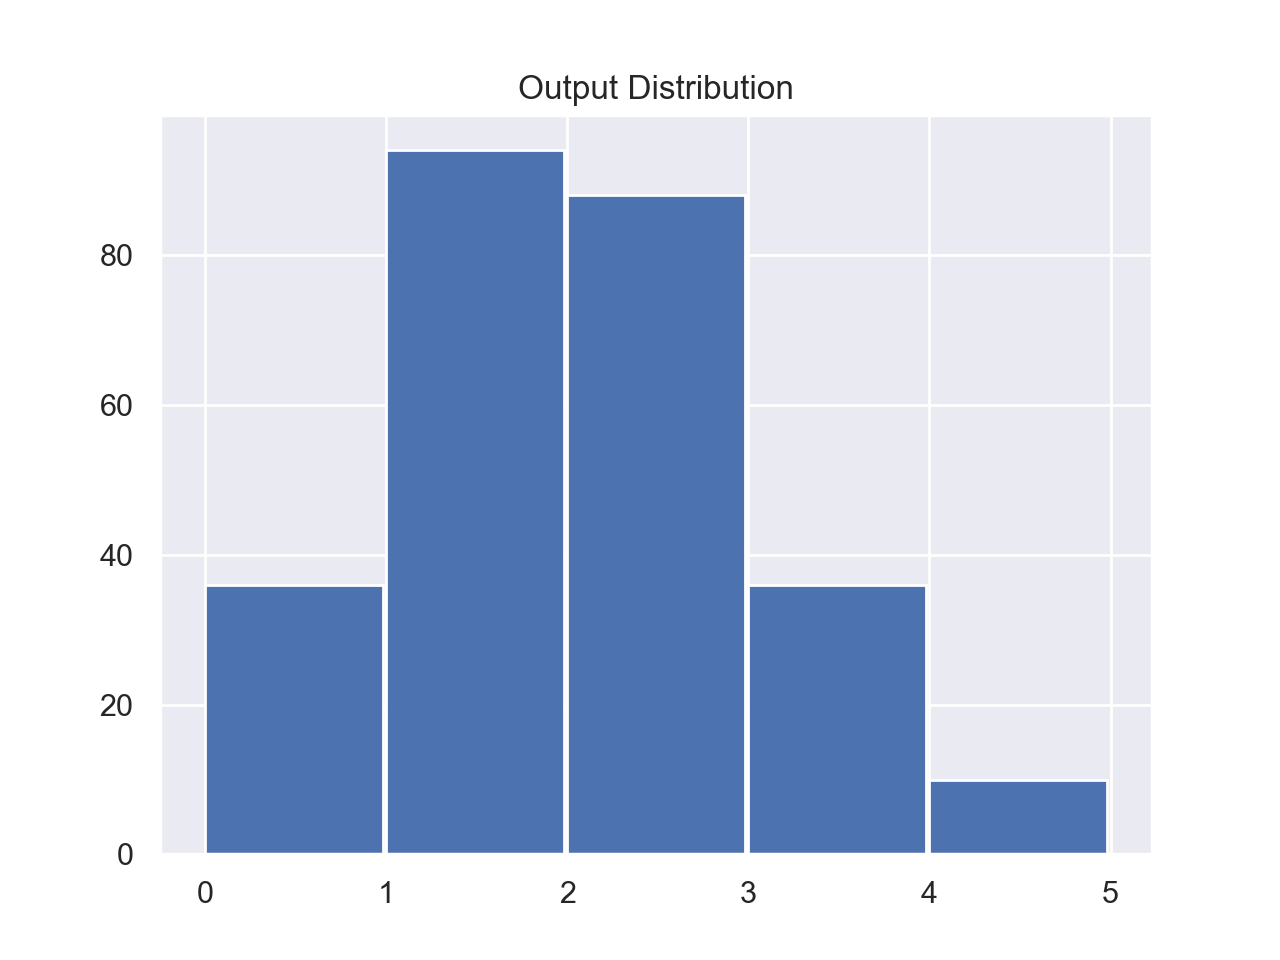

In [116]:
hist, bin_edges = np.histogram(y, bins = 5, range = (0,5))
fig = plt.figure()
plt.bar(bin_edges[:-1],hist,width=.98,align='edge')
plt.title("Output Distribution")
plt.show()

Remark: Most of our values falls within [1-3]. The highest yields [4-5], unsurprisingly, are the fewest

## 0.0.3 Construct a Scoring system

### i- Scorer class
First construct a scoring class. This will keep track of all our scores.

- v1: 

In [117]:
class ScoreSheet:
    def __init__(self,title):
        self.title=title
        self.sheet = pd.DataFrame({})
        
    def add_score(self,name,list):
        self.sheet.loc[name]=list
        
    def add_score(self,series):
        self.sheet = self.sheet.append(series)
        
    def get_pred_labels(self):
        return list(self.sheet.columns)
    
    def get_test_labels(self):
        return list(self.sheet.index)
    
    def get_test(self,name):
        return self.sheet.loc[name]
    
    def get_predictor(self,name):
        return list(self.sheet[name])
    
    def get_sheet(self):
        return self.sheet
    
    

### ii - Drawer class

This class will help with the plotting of graphs in the Scorer

- v1.0

In [160]:
import seaborn as sns
sns.set()

class Draw:
    def heatmap(ss):
        ax=sns.heatmap(ss.get_sheet(),annot=True, fmt=".3f",cmap="coolwarm", center = 0.1 ,
                       square = True,linewidths=.1,vmin=-1,vmax=1,cbar=False)
    
    def lineplot(df,cols):
        ax = plt.subplot()
        for name in cols:
            x = df.get_test_labels()
            y = df.get_predictor(name)
            plt.plot(x,y)
            ax.set_ylim([0.0,1.0])
        ax.legend()
        plt.show()
        

### iii - Test class

In [152]:
from random import random
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split  

class Test:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        
    def y_stratified(self):
        return np.array(self.y,dtype="int")
    
    def test(self,name,predictors):
        dummy = [random() for i in range(len(predictors))]
        return pd.Series(dummy,index=predictors,name=name)

In [153]:
test1 = Test(X,y)
test1.y_stratified().ravel().T

array([0, 0, 0])

In [154]:
ss = ScoreSheet("Training")
sc = test1.test("Raw",["ADA","RFR","SVR","XGB"])
ss.add_score(sc)
sc = test1.test("GridSearch",["ADA","RFR","SVR","GB"])
ss.add_score(sc)
sc = test1.test("KBest",["ADA","SVR","XGB","GB"])
ss.add_score(sc)
ss.get_sheet()

,ADA,RFR,SVR,XGB,GB
Raw,0.552979,0.064070,0.771476,0.127806,NaN
GridSearch,0.448451,0.746412,0.747449,NaN,0.871498
KBest,0.879247,NaN,0.286124,0.386224,0.321890


<IPython.core.display.Javascript object>


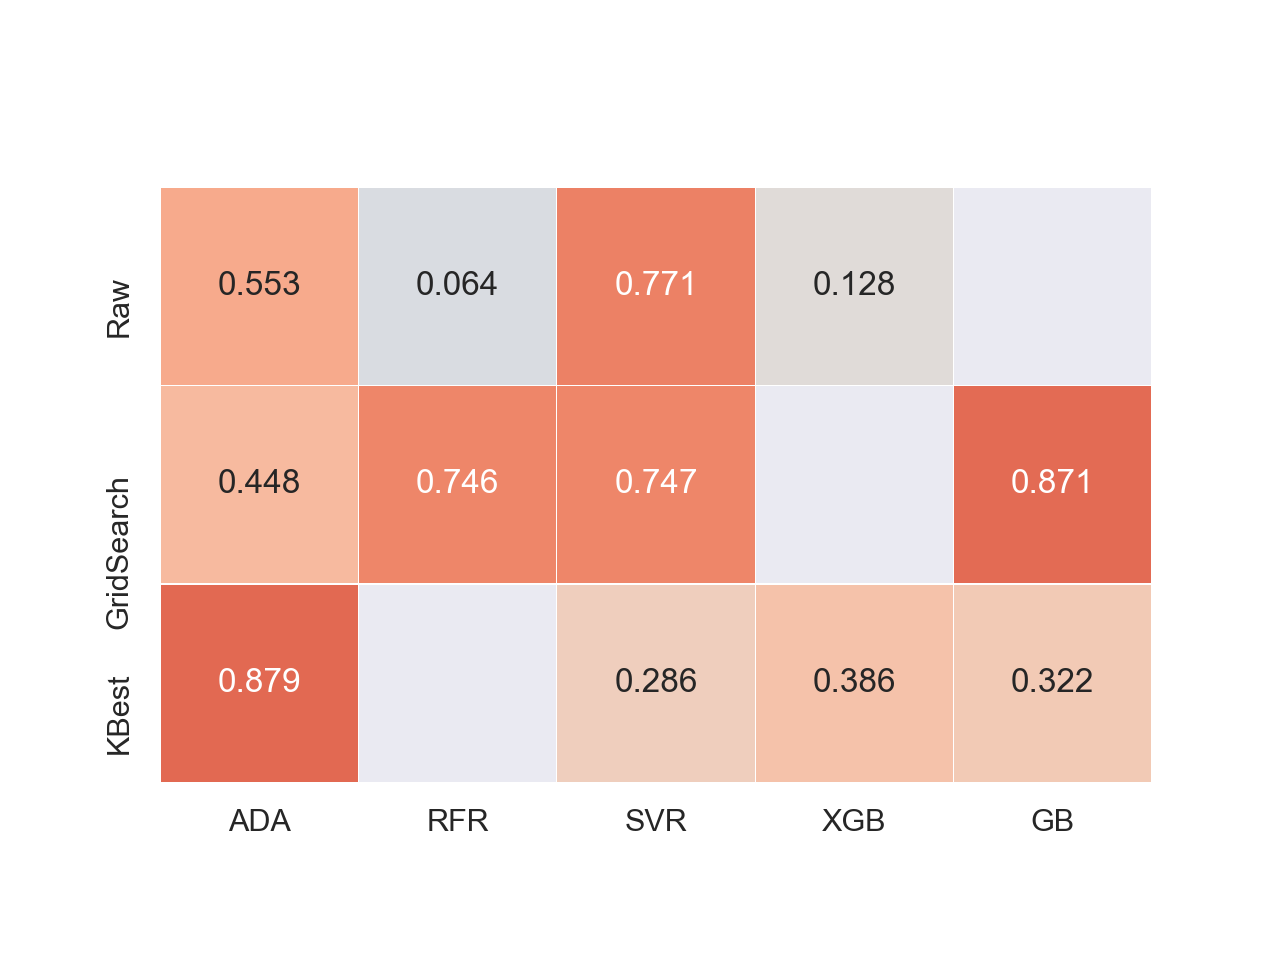

In [156]:
Draw.heatmap(ss)

<IPython.core.display.Javascript object>


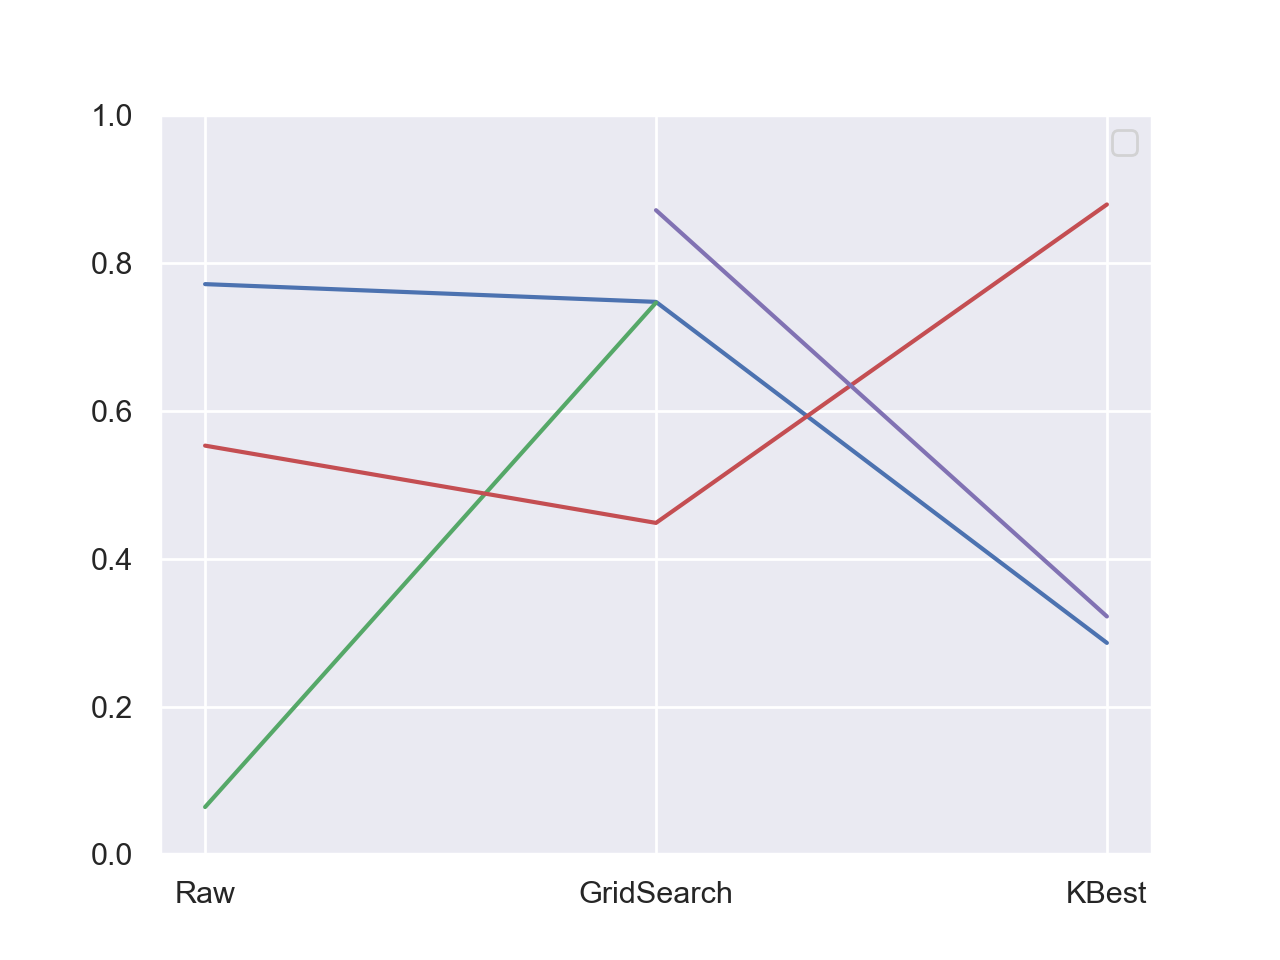

No handles with labels found to put in legend.


In [161]:
Draw.lineplot(ss,["SVR","XGB","RFR","ADA","GB"])